In [1]:
state = 'WV' 
year = 2020

In [2]:
import sys, os
src_path = os.path.abspath(os.path.join('..', '..', 'src'))
sys.path.append(src_path)

In [3]:
filepath = '../../dat/' + str(year) + '/'
filename = state + '_county.json'
filename2 = state + '_county.shp'

In [4]:
from read import read_graph_from_json
from epsilon_constraint import*
import networkx as nx

G = read_graph_from_json(state, filepath + filename, year=year)
print(f"The state of {state} has {G._k} districts.")
G._ideal_population = sum(G.nodes[i]['TOTPOP'] for i in G.nodes) / G._k

The state of WV has 2 districts.


In [5]:
#import warm starts
sys.path.append(os.path.abspath('../heuristic'))

from WV_plans_2020 import plans
print(f"Loaded {len(plans)} plans from file.")
warm_starts = plans

Loaded 10 plans from file.


In [6]:
obj_type = 'perimeter'
starting_deviation = 0.01 
verbose = True
contiguity = 'lcut'               # {'lcut', 'scf', 'shir'}
warm_start_mode = 'user'          # {'None', 'user', 'refinement'}
warm_starts = warm_starts         # if you have user define warm starts else it is None
time_limit = 7200                 # Time limit in seconds, adjust as needed
multiplier = 0                    # Adjust multiplier as needed
max_B = True                      # If symmetry_breaking is 'orbitope' or you have warm_start, max_B should be True
symmetry_breaking = 'orbitope'    # {None, 'orbitope', 'rsum'}              
sizes = None

In [7]:
print(f"Running epsilon constraint method for state {state}, objective {obj_type}")
print(f"{'#' * 100}\n")
(plans, obj_bounds, deviations) = epsilon_constraint_method(
            G,                 
            obj_type,          
            contiguity,        
            cutoff=None,       
            verbose=verbose,
            warm_start_mode = warm_start_mode,
            warm_starts=warm_starts,  
            starting_deviation=starting_deviation, 
            time_limit=time_limit, 
            sizes=sizes,      
            max_B=max_B,      
            symmetry_breaking=symmetry_breaking, 
        )

Running epsilon constraint method for state WV, objective perimeter
####################################################################################################

L = 887890 and U = 905826

****************************************
Trying deviation = 8968.58
****************************************
Using user-provided warm starts.
Selected warm_start = [[0, 2, 4, 8, 13, 15, 17, 18, 19, 20, 22, 23, 26, 27, 28, 29, 31, 33, 34, 36, 45, 49, 50, 52, 54], [1, 3, 5, 6, 7, 9, 10, 11, 12, 14, 16, 21, 24, 25, 30, 32, 35, 37, 38, 39, 40, 41, 42, 43, 44, 46, 47, 48, 51, 53]]
Objective value: 31.144834513727915
Deviation: 27.0

****************************************
Running labeling model!
****************************************
L = 887890 and U = 905826
Set parameter Username
Set parameter LicenseID to value 2608266
Academic license - for non-commercial use only - expires 2026-01-09
sizes =  [1, 1]
Solving the max B problem (as MIP) for use in the vertex ordering...
Set parameter LogToCon


Explored 335 nodes (9174 simplex iterations) in 2.17 seconds (0.16 work units)
Thread count was 20 (of 20 available processors)

Solution count 4: 27.596 29.8527 30.8597 31.1448 

Optimal solution found (tolerance 0.00e+00)
Best objective 2.759596830143e+01, best bound 2.759596830143e+01, gap 0.0000%

User-callback calls 1161, time in user-callback 0.04 sec

****************************************
Optimal solution found! Gurobi status: 2
****************************************
[[0, 1, 2, 4, 8, 13, 17, 18, 19, 20, 22, 23, 26, 27, 28, 29, 31, 33, 34, 36, 43, 45, 49, 50, 52, 54], [3, 5, 6, 7, 9, 10, 11, 12, 14, 15, 16, 21, 24, 25, 30, 32, 35, 37, 38, 39, 40, 41, 42, 44, 46, 47, 48, 51, 53]]

****************************************
Trying deviation = 2963.75
****************************************
Using user-provided warm starts.
Selected warm_start = [[0, 2, 4, 8, 13, 15, 17, 18, 19, 20, 22, 23, 26, 27, 28, 29, 31, 33, 34, 36, 45, 49, 50, 52, 54], [1, 3, 5, 6, 7, 9, 10, 11, 12, 14, 1

*  332   176              19      28.9482427   26.57777  8.19%  33.5    1s
H  566   162                      28.3451219   26.91924  5.03%  31.0    1s
*  659    55               8      28.0303535   27.25492  2.77%  29.2    1s

Cutting planes:
  Gomory: 3
  Cover: 3
  Clique: 3
  Zero half: 9
  Lazy constraints: 5

Explored 770 nodes (20382 simplex iterations) in 2.27 seconds (0.21 work units)
Thread count was 20 (of 20 available processors)

Solution count 6: 28.0304 28.3451 28.9482 ... 31.1448

Optimal solution found (tolerance 0.00e+00)
Best objective 2.803035350565e+01, best bound 2.803035350565e+01, gap 0.0000%

User-callback calls 2041, time in user-callback 0.24 sec

****************************************
Optimal solution found! Gurobi status: 2
****************************************
[[0, 1, 2, 4, 6, 8, 9, 13, 17, 18, 19, 20, 22, 23, 26, 28, 29, 30, 31, 33, 34, 36, 43, 45, 49, 50, 52, 54], [3, 5, 7, 10, 11, 12, 14, 15, 16, 21, 24, 25, 27, 32, 35, 37, 38, 39, 40, 41, 42, 44, 46

     0     0   24.16909    0   74   31.14483   24.16909  22.4%     -    0s
     0     0   24.22499    0   77   31.14483   24.22499  22.2%     -    0s
     0     0   24.22548    0   86   31.14483   24.22548  22.2%     -    1s
     0     0   24.23418    0   83   31.14483   24.23418  22.2%     -    1s
     0     0   24.23418    0   84   31.14483   24.23418  22.2%     -    1s
     0     0   24.25170    0   86   31.14483   24.25170  22.1%     -    1s
     0     0   24.25623    0   89   31.14483   24.25623  22.1%     -    1s
     0     0   24.25696    0   89   31.14483   24.25696  22.1%     -    1s
     0     2   24.27072    0   89   31.14483   24.27072  22.1%     -    1s
*  124   110               9      29.5833036   26.00837  12.1%  43.9    1s
*  415   163              10      29.4000964   26.70564  9.16%  34.8    1s
H  431   163                      28.9550654   26.70564  7.77%  34.7    1s

Cutting planes:
  Gomory: 3
  Cover: 6
  Clique: 3
  Zero half: 13
  Lazy constraints: 3

Explored 

     0     0   24.26766    0   71   31.14483   24.26766  22.1%     -    0s
     0     0   24.27752    0   72   31.14483   24.27752  22.0%     -    0s
     0     0   24.27752    0   73   31.14483   24.27752  22.0%     -    0s
     0     0   24.35050    0   71   31.14483   24.35050  21.8%     -    0s
     0     0   24.35483    0   74   31.14483   24.35483  21.8%     -    0s
     0     0   24.40078    0   74   31.14483   24.40078  21.7%     -    0s
     0     0   24.41949    0   71   31.14483   24.41949  21.6%     -    0s
     0     0   24.42183    0   74   31.14483   24.42183  21.6%     -    0s
     0     0   24.43992    0   74   31.14483   24.43992  21.5%     -    0s
     0     2   24.44906    0   74   31.14483   24.44906  21.5%     -    1s
  4359  1001     cutoff   21        31.14483   28.86214  7.33%  18.2    5s

Cutting planes:
  Gomory: 3
  Cover: 134
  Clique: 3
  Inf proof: 12
  Zero half: 10
  Lazy constraints: 11

Explored 9165 nodes (158667 simplex iterations) in 6.31 seconds (

     0     0   24.47226    0   78   33.48878   24.47226  26.9%     -    0s
     0     2   24.48814    0   78   33.48878   24.48814  26.9%     -    0s
  4171  1999   30.13277   34   21   33.48878   27.85481  16.8%  21.5    5s
 20834  5898   30.46628   27   55   33.48878   29.22734  12.7%  17.3   10s
 29357  7617   32.08379   31   50   33.48878   29.58930  11.6%  17.2   15s
 40209  9219   30.23437   31    8   33.48878   30.01383  10.4%  16.9   20s
 53898 10593     cutoff   38        33.48878   30.42164  9.16%  16.9   25s
 73086 10791   31.65550   32   25   33.48878   30.91119  7.70%  16.8   30s
H86246  9611                      33.0544207   31.24305  5.48%  16.7   33s
 92038  7569   32.71111   33   10   33.05442   31.46039  4.82%  16.7   35s
*94469  6198              34      32.6116069   31.55749  3.23%  16.7   35s

Cutting planes:
  Gomory: 2
  Zero half: 8
  Lazy constraints: 31

Explored 103454 nodes (1667034 simplex iterations) in 36.50 seconds (4.21 work units)
Thread count was 20 (

In [8]:
result = list(zip(plans, obj_bounds , deviations))

In [9]:
# Determine the senses for the Pareto frontier
# Minimize the first objective ('deviation').
# Maximize the second objective for compactness types, otherwise minimize it.
senses = ['min', 'max' if obj_type in ['average_Polsby_Popper','bottleneck_Polsby_Popper'] else 'min']
obj_names = ['deviation_persons', obj_type]
infeasible_region = [0, min(round(r[2],1) for r in result)]


####################################################################################################
Pareto Frontier for state WV,  objective perimeter
####################################################################################################

Pareto front plans: [[[0, 2, 4, 6, 8, 9, 13, 17, 19, 20, 22, 23, 26, 28, 29, 31, 33, 34, 36, 42, 43, 45, 50, 51, 54], [1, 3, 5, 7, 10, 11, 12, 14, 15, 16, 18, 21, 24, 25, 27, 30, 32, 35, 37, 38, 39, 40, 41, 44, 46, 47, 48, 49, 52, 53]], [[0, 1, 2, 5, 13, 17, 18, 19, 20, 22, 23, 26, 28, 29, 31, 33, 34, 36, 45, 46, 49, 50, 52, 54], [3, 4, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 21, 24, 25, 27, 30, 32, 35, 37, 38, 39, 40, 41, 42, 43, 44, 47, 48, 51, 53]], [[0, 2, 6, 7, 17, 19, 21, 23, 24, 26, 28, 29, 31, 32, 33, 34, 35, 36, 39, 42, 45, 50, 51], [1, 3, 4, 5, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 20, 22, 25, 27, 30, 37, 38, 40, 41, 43, 44, 46, 47, 48, 49, 52, 53, 54]], [[0, 2, 4, 8, 13, 15, 17, 18, 19, 20, 22, 23, 26, 27, 28, 29, 31, 33, 34, 36

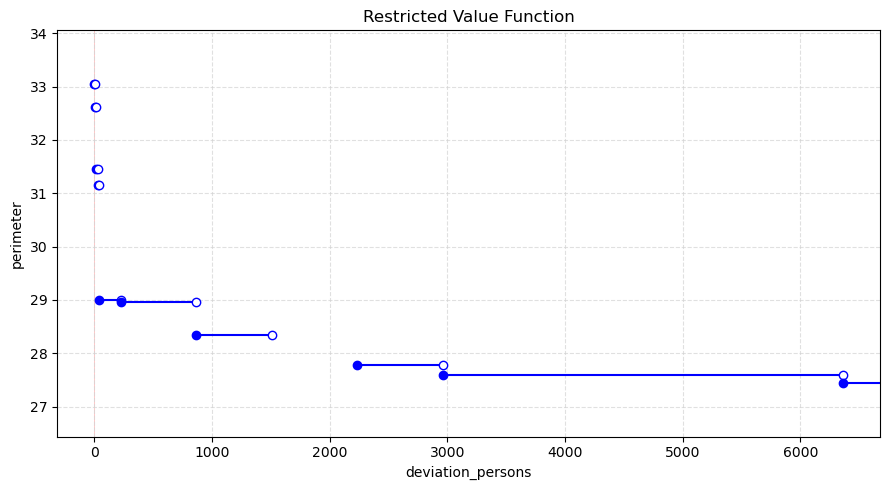

In [10]:
from pareto import ParetoFrontier

print(f"\n{'#' * 100}\nPareto Frontier for state {state},  objective {obj_type}\n{'#' * 100}\n")
pareto = ParetoFrontier(senses, obj_names, state=state, level='county')

if not  plans:
    print("No plan found!")
else:
    for plan, obj_bound, dev in result:
        upper_bound = [dev,  1/obj_bound[0] if  obj_type == 'bottleneck_Polsby_Popper' else obj_bound[0]]
        lower_bound = [dev,  1/obj_bound[1] if  obj_type == 'bottleneck_Polsby_Popper' else obj_bound[1]]
        
        pareto.add_plan(plan, upper_bound, lower_bound)
            
print("Pareto front plans:", pareto.plans)
print("Pareto front upper bounds:", pareto.upper_bounds)
print("Pareto front lower bounds:", pareto.lower_bounds)
    
#extra_points: list of tuples, each containing (deviation, objective_value, label)
if  year == 2010:
    
    #2010 enacted map scores
    enacted_map_deviation = 3197.333333333372
    enacted_map_scores = {'inverse_Polsby_Popper': 7.75, 'cut_edges': 34.00, 
                                      'perimeter': 42.12, 'average_Polsby_Popper': 0.14,'bottleneck_Polsby_Popper': 0.10}
    # Cooper plan 1
    Cooper_plan_1_deviation = 323.66666666662786
    Cooper_plan_1_scores = {'inverse_Polsby_Popper': 7.31, 'cut_edges': 34.00, 
                                      'perimeter': 40.53, 'average_Polsby_Popper': 0.17,'bottleneck_Polsby_Popper': 0.10}
    # Cooper plan 2
    Cooper_plan_2_deviation = 232.66666666662786
    Cooper_plan_2_scores = {'inverse_Polsby_Popper': 8.18, 'cut_edges': 36.00, 
                                      'perimeter': 43.36, 'average_Polsby_Popper': 0.16,'bottleneck_Polsby_Popper': 0.09}
    # Cooper plan 3
    Cooper_plan_3_deviation = 115.66666666662786
    Cooper_plan_3_scores = {'inverse_Polsby_Popper': 7.25, 'cut_edges': 35.00, 
                                      'perimeter': 40.65, 'average_Polsby_Popper': 0.16,'bottleneck_Polsby_Popper': 0.09}
    extra_points = [
                (enacted_map_deviation,  enacted_map_scores[obj_type], 'Enacted Map'),
                (Cooper_plan_1_deviation,  Cooper_plan_1_scores[obj_type] , 'Cooper plan 1'),
                (Cooper_plan_2_deviation,  Cooper_plan_2_scores[obj_type], 'Cooper plan 2'),
                (Cooper_plan_3_deviation, Cooper_plan_3_scores[obj_type], 'Cooper plan 3'),
                        ]
    
    #extra_colors: list of colors corresponding to the points in extra_points
    extra_colors = ['r', 'g', 'c', 'y']  # Red, Green, Cyan, Yellow for each of the extra points
    
    for ep in extra_points:
        print(f"The {ep[2]} has an objective value of {ep[1]} and a deviation of {ep[0]}.")
else:
    extra_points = None
    extra_colors = None
        
pareto.tighten_lower_bounds()
    
if infeasible_region[1] > 0.5:
    max_dev = max(upper_bound[0] for upper_bound in pareto.upper_bounds)
    max_obj = max(upper_bound[1] for upper_bound in pareto.upper_bounds)
    min_obj = min(upper_bound[1] for upper_bound in pareto.upper_bounds)
    o1lim=[-1, max_dev+100]
    o2lim=[min_obj*0.9, max_obj*(1.1)]
else:
    o1lim = None
    o2lim = None

pareto.plot_with_custom_x_ranges(method = 'epsilon_constraint_method', splits=None, 
                                 o1lim=o1lim, o2lim=o2lim, infeasible_region = infeasible_region,
                                 extra_points=extra_points, extra_colors=extra_colors)   


####################################################################################################
Pareto maps for state WV, objective perimeter
####################################################################################################



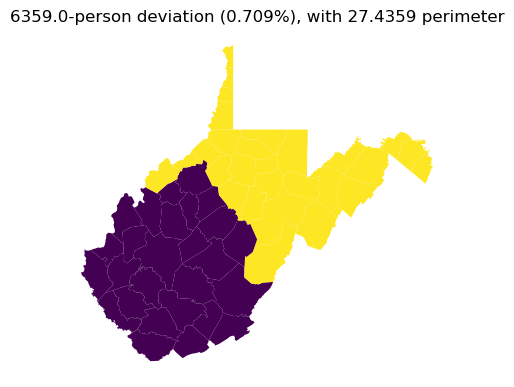

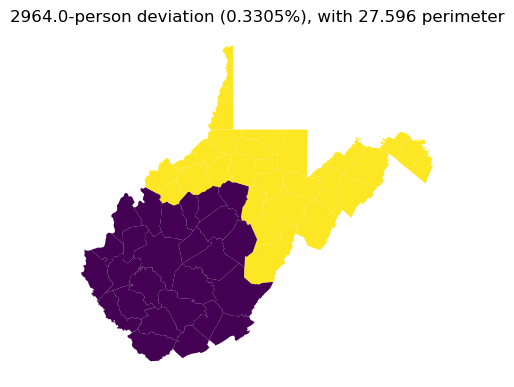

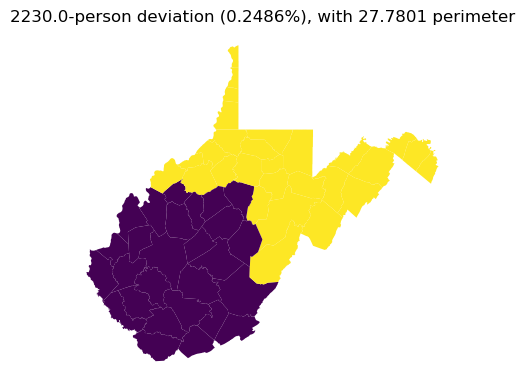

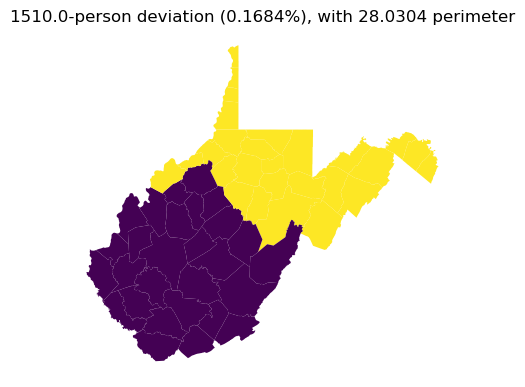

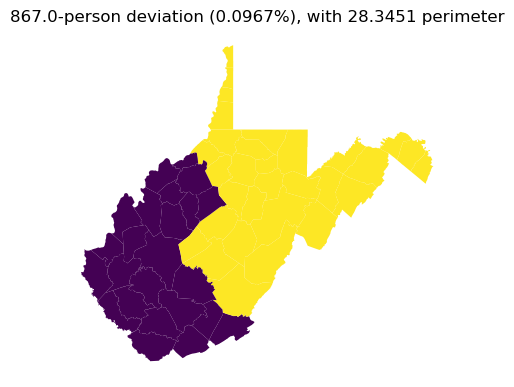

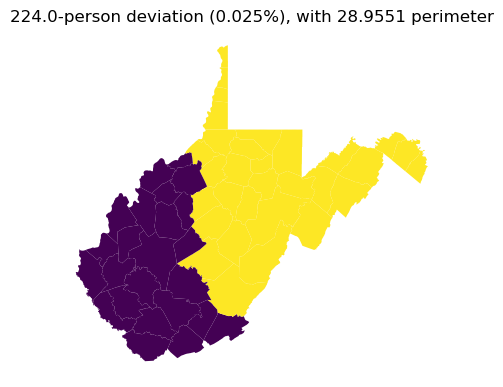

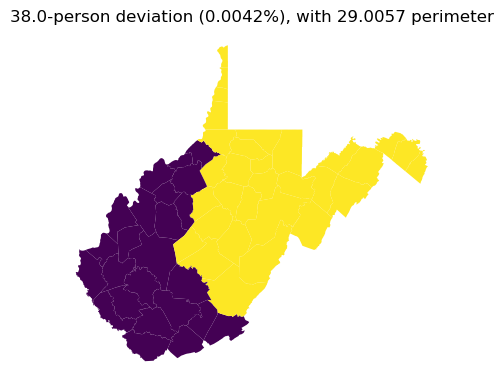

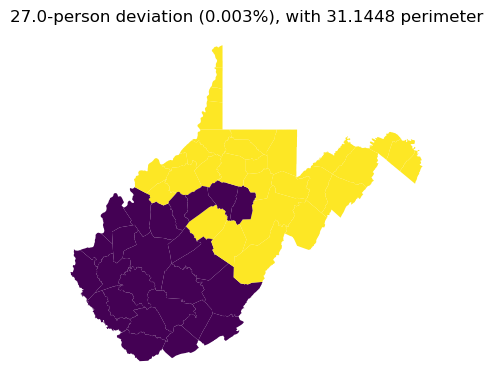

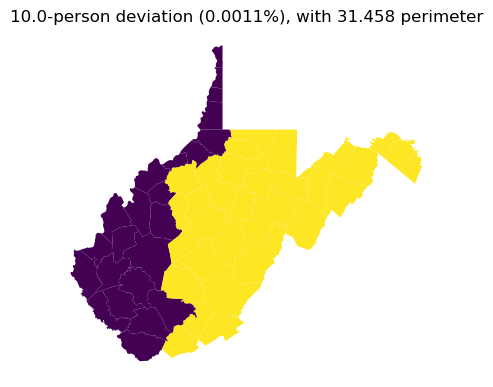

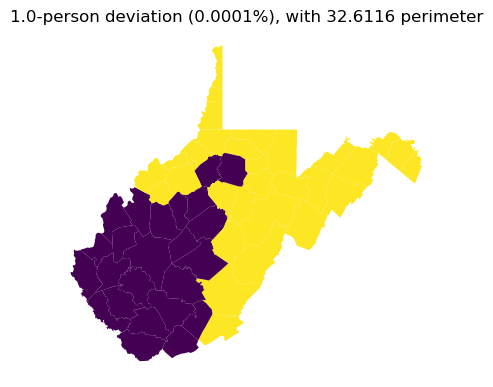

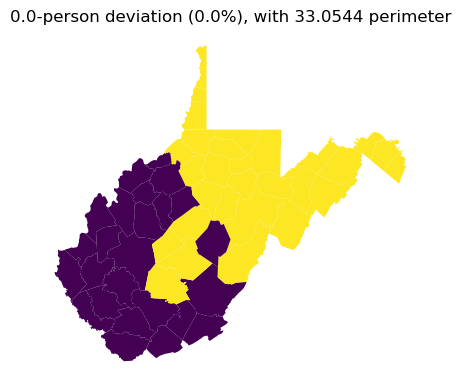

In [11]:
from draw import *

print(f"\n{'#' * 100}\nPareto maps for state {state}, objective {obj_type}\n{'#' * 100}\n")

format_obj = {
    'bottleneck_Polsby_Popper': lambda x: round(1 /x, 4),
    'cut_edges': lambda x: round(x, 0)}

for plan, obj_bound, dev in result:
    ub = format_obj.get(obj_type, lambda x: round(x, 4))(obj_bound[0])
    lb = format_obj.get(obj_type, lambda x: round(x, 4))(obj_bound[1])
    deviation_percentage = round(100 * dev / G._ideal_population, 4)
    if ub != lb:
        title = f"{round(dev, 2)}-person deviation ({deviation_percentage}%), obj_bounds [{ub}, {lb}] {obj_type}"
    else:
        title = f"{round(dev, 2)}-person deviation ({deviation_percentage}%), with {ub} {obj_type}"

    draw_plan(filepath, filename2, G, plan, title=title, year=year)